# Learning Quantum Computing with Qiskit

Quantum computing is a rapidly advancing field with the potential to redefine computation and problem-solving as we know it. As technology advances, quantum computers show promise in tackling challenges that are currently out of reach for classical computers. By understanding the basics of quantum computing, enthusiasts and professionals alike can begin to appreciate its transformative capabilities and future applications.

Quantum computers can solve problems exponentially faster than traditional computers, allowing them to tackle issues that would take classical computers thousands of years in mere minutes. Consequently, it has major applications in fields like materials science, chemistry, and molecular biology. Additionally, quantum computing has significant implications for cybersecurity. Its sheer computational power threatens current encryption protocols. In turn, it drives the development of post-quantum cryptography, which promises stronger data protection in an age where quantum computers are commonplace. Through this tutorial, we aim to provide users with an introduction to this field using Qiskit. Qiskit is an open source Python SDK developed by IBM, who is a leader in quantum computing. Through Qiskit, we can access their quantum computers to run our own programs.

#### Learning Objectives
By the end of this tutorial, you will:
+ Understand the basics of quantum computing
+ Be familiar with the basics of the Qiskit SDK
+ Understand the Qiskit workflow
+ Have enough background knowledge to learn more about and start quantum computing projects

#### Before you start 
This tutorial is meant for those who:
+ Are comfortable with Python
+ Are familiar with Matplotlib (recommended)
+ Know some linear algebra (recommended)
+ Have no prior experience with quantum information/computing!

This tutorial also uses LaTeX, so be sure you have the Juptyer LaTeX library installed.

In [6]:
%pip install jupyterlab-latex


  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl.metadata (4.1 kB)
  Using cached PyYAML-6.0.2-cp313-cp313-win_amd64.whl.metadata (2.1 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 16.4 MB/s eta 0:00:00
Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl (15 kB)
Using cached PyYAML-6.0.2-cp313-cp313-win_amd64.whl (156 kB)


# I. Introduction to Quantum Computing

In this section, we’ll provide an overview of some foundational concepts in quantum computing. This will be a theory-focused section where we learn crucial background knowledge necessary for the rest of the tutorial. The main goal is to introduce key differences between classical and quantum computing, along with essential quantum concepts, in a beginner-friendly manner. After this section, you should have a high-level understanding of how what quantum computing entails and feel prepared to explore the basics of quantum programming through Qiskit. 

## Classical Computing vs. Quantum Computing

Quantum computing works in a different way than the classical computing that we're used to. A classical computer is what you are viewing this on right now, and includes things like laptops, PCs, smartphones, and tablets. Quantum computers are a new technology, and are typically kept in strictly monitored environments that prevent physical disturbances to the computer. These computers have a much higher processing power than their classical counterparts. Even though they are both computers, the way they operate is fundamentally different. The following are some key differences in how these computers work: 

### Classical Computers
* Store data in bits
* Operations are based on Boolean algebra
* Circuits are modeled from classical physics
* Bits can only be in two states: 0 or 1

### Quantum Computers
* Store data in qubits
* Operations are based on linear algebra
* Circuits are modeled from quantum mechanics
* Qubits can be in a combination of 0 or 1, meaning there are infinitely many unique qubit states


## What is a Qubit?

A qubit, which is short for quantum bit, is the basic unit of information in quantum computing.
A qubit is a two-state quantum system that can represent a 0, a 1, or any proportion of both. A two-state quantum system has two physically distinguishable features. These features are what encode 0 and 1. For example, the spin of an electron can be used as a qubit, with spin up and spin down representing 0 and 1 respectively. Overall, qubits are created by manipulating and measuring quantum particles, such as electrons, photons, and trapped ions. 

Additionally, qubits use quantum mechanical phenomena like superposition and entanglement to encode and process information.

1. **Superposition** is the principle that a quantum system can exist in multiple states simultaneously. For instance, in a classical scenario, a coin must be either heads or tails when observed. However, in quantum mechanics, a qubit can be in a state of "0" and "1" at the same time until it is measured. When the qubit is measured, it "collapses" into one of the two possible outcomes (either "0" or "1").

2. **Entanglement** is a quantum phenomenon where two or more particles become interconnected in such a way that the state of one particle directly affects the state of the other, no matter the distance between them. This connection creates a "shared" state across particles.

Furthermore, qubits behave differently from classical bits because of the quantum properties they have. Quantum computing uses qubits to execute calculations instead of the electrical signals used in classical computing. 

## Notation

To better understand qubits, we need a way to represent them. The most common way this is done is with **Dirac Notation**, also known as **Bra-ket** notation.

We can notate an arbitrary qubit as follows:

$$
\ket{\psi} = \alpha\ket{0} + \beta\ket{1}
$$

Note that $\ket{}$ is called a ket

Here, the qubit $\ket{\psi}$ is in superposition. Recall that this means that it's some proportion of both $\ket{0}$ and $\ket{1}$. Due to quantum mechanics, when we measure this qubit, it collapses and we observe it as either $\ket{0}$ or $\ket{1}$. It turns out, what we see depends on the superposition.

In particular, the probability that we find the qubit in $\ket{0}$ is $|\alpha|^2$ and the probability we find qubit in $\ket{1}$ is $|\beta|^2$.

Also note that since we find *either* $\ket{0}$ or $\ket{1}$, it must be true that $|\alpha|^2 + |\beta|^2 = 1$. In other words, the probabilites must sum to 100%. 

These kets can also be represented as column vectors. In particular,

$$
\ket{0} = \begin{bmatrix}1 \\ 0 \end{bmatrix}
\:
\ket{1} = \begin{bmatrix}0 \\ 1 \end{bmatrix}
$$

Therefore,
$\ket{\psi} = \begin{bmatrix}\alpha \\ \beta \end{bmatrix}$.

This notation proves useful when trying to understanding quantum logic gates (explained in the next section).

We can extend this notation to include states with multiple qubits. Let's first consider the basis states $\ket{0}$ and $\ket{1}$. For a two-qubit state with qubits $A$ and $B$, there are 4 possible basis states: when both qubits are $\ket{0}$, qubit $A$ is $\ket{0}$ and qubit $B$ is $\ket{1}$, qubit $A$ is $\ket{1}$ and qubit $B$ is $\ket{0}$, and when both qubits are $\ket{1}$. In Dirac notation:

$$
\ket{0}_A\ket{0}_B \to \ket{00}
\newline
\ket{0}_A\ket{1}_B \to \ket{01}
\newline
\ket{1}_A\ket{0}_B \to \ket{10}
\newline
\ket{1}_A\ket{1}_B \to \ket{11}
$$

So, for an arbitrary two-qubit state:

$$
\ket{\psi} = \alpha\ket{00} + \beta\ket{01} + \gamma\ket{10} + \delta\ket{11}
$$

Here, $\ket{\psi}$ represents a two-qubit state in an arbitrary superposition. From this state, we can see that there's a probability of:
+ $|\alpha|^2$ that both qubits are $\ket{0}$ (which is notated as $\ket{00}$)
+ $|\beta|^2$ that the first qubit is $\ket{0}$ and the second qubit is $\ket{1}$ (notated as $\ket{01}$)
+ $|\gamma|^2$ that the first qubit is $\ket{1}$ and the second qubit is $\ket{0}$ (notated as $\ket{10}$)
+ $|\delta|^2$ that both qubits are $\ket{1}$ (notated as $\ket{11}$)

As vectors:

$$
\ket{00} = \begin{bmatrix}1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
\:
\ket{01} = \begin{bmatrix}0 \\ 1 \\ 0 \\ 0 \end{bmatrix}
\:
\ket{10} = \begin{bmatrix}0 \\ 0 \\ 1 \\ 0 \end{bmatrix}
\:
\ket{11} = \begin{bmatrix}0 \\ 0 \\ 0 \\ 1 \end{bmatrix}
\:
\ket{\psi} = \begin{bmatrix}\alpha \\ \beta \\ \delta \\ \gamma \end{bmatrix}


## Quantum Logic Gates
At the circuit level, classical computers are a bunch of logic gates. Similarly, the circuits for quantum computers make use of *quantum logic gates*, which are also known as *operators*. Mathematically, these logic gates are matrices. When a qubit goes through a gate in a quantum circuit, the qubit (represented as a vector) is transformed by the gates (which are matrices) via matrix multiplication. Here, we will go over some of the major gates and what they are used for.

### X Gate
$$ 
X = 
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$ 

So,

$X\ket{0} = \ket{1}$

$X\ket{1} = \ket{0}$

$X\ket{\psi} = \alpha\ket{1} + \beta\ket{0}$

We can think of the $X$-gate as a NOT gate.

### Z Gate
$$ 
Z = 
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$ 

So,

$Z\ket{0} = \ket{0}$

$Z\ket{1} = -\ket{1}$

$Z\ket{\psi} = \alpha\ket{0} - \beta\ket{1}$

The $Z$-gate performs a *phase shift* within our qubit. 

Here, the *phase* is the negative assign that got attached to $\ket{1}$. Don't worry if you don't understand what a *phase* is, just understand that if we don't account for phases, we limit the number of possible states our qubits can have. So, we will need a way to add a phase to be able to fully manipulate our qubits.

### Hadamard Gate
$$
H =
\begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
\end{bmatrix}
$$

So,

$H\ket{0} = \frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}}\ket{1}$

$H\ket{1} = \frac{1}{\sqrt{2}}\ket{0} - \frac{1}{\sqrt{2}}\ket{1}$

$H\ket{\psi} = \frac{\alpha}{\sqrt{2}}\ket{0} - \frac{\beta}{\sqrt{2}}\ket{1}$


The Hadamard gate puts a qubit into an equal superposition. This means that when we measure the output, there will be an equal chance to get any one of the qubit's basis states (i.e. $\ket{0}$ and $\ket{1}$). Note that for $\ket{1}$, it adds a phase.

### CNOT Gate
Unlike the past three gates, CNOT gates act on two qubits at a time.
$$
CNOT =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

So,

$$
CNOT\ket{00} = \ket{00}
\newline
CNOT\ket{01} = \ket{01}
\newline
CNOT\ket{10} = \ket{11}
\newline
CNOT\ket{00} = \ket{10}
$$

The CNOT gate is a *controlled* NOT gate. It applies an X-gate on the target qubit depending on the value of the control qubit. Here, the control qubit is the first qubit, and the target qubit is the second qubit. So, whenever the first qubit is a $\ket{1}$, the second qubit is flipped (as if a NOT gate was applied to it). If instead the first qubit is a $\ket{0}$, nothing happens to the second qubit. 

This gate is used to entangle qubits together.


## Additional Terminology & Concepts

**Probabilistic Nature of Quantum Computers**

Classical computing calculations yield definite answers (like 0s and 1s). However, since quantum computers use quantum mechanics, calculations are probabilistic. Consequently, a quantum program may yield different results each time it's run. As mentioned previously, the state of a qubit is not known with certainty until it is measured. After it's measured, it's state becomes definite.

One example of this is presented through qubit superposition. As mentioned above, a qubit be in a state where it's simultaneously a little bit of both 0 and 1. In such states, qubits are understood as the probabilities of it being measured as 0 or 1. An interesting consequence of this is that we can perform computations in parallel, rather than in sequence like with classical computation. This is what allows for the exponential speedup that quantum computers are famous for. Since qubits can end up in superpostiion, results will reflect its probabilities of being either 0 or 1 over many runs, providing a meaningful distrbuion of possible outcomes.   

Each possible basis state (for our purposes, $\ket{0}$ and $\ket{1}$) in a quantum system has a complex number called an amplitude, which when squared, gives the probability of observing that state upon measurement. Using the example of $\ket{\psi}$ from above, the amplitude for $\ket{0}$ is $\alpha$ and the amplitude for $\ket{1}$ is $\beta$. The probability distribution is derived from these amplitudes and provides a snapshot of what we will likely find when the qubit is measured. 

Understanding probability distribution is fundamental to interpreting quantum computing results.  Thankfully, Qiskit includes tools to visualize these distributions which we will go over later in this tutorial. 


**Observables** 

An observable is a physical quantity of a quantum system that can be measured. These observables are represented as operators because if a quantum state was transformed by that operator it would give us information on observable quantities of the system. Some example of physical quantities that can be measured with observables are position, momentum, and spin.

**Expectation Values** 

As we just discussed, the probabilistic nature of quantum mechanics means that each time we measure a system, it's value is dependent on some probability distribution. Just like with classical probability, an expectation value in quantum mechanics is the expected measurement of an experiment. More specifically, the expectation value is the average of all possible events weighted by their probability of occurring. 

With Dirac Notation:
$$
\langle A \rangle = \bra{\psi}A\ket{\psi}
$$

Where $\ket{\psi}$ is a quantum state (i.e. a qubit) and $A$ is an observable. In other words the expectation value $\langle A \rangle$ represents the average result after measuring A many times on state $\ket{\psi}$. 

More precisely, measuring an operator $A$ means projecting $\ket{\psi}$ onto one of A's eigenstates, which has a corresponding eigenvalue. 

# Part II. Using Qiskit

Now that we've covered the basics of quantum computing, we can start coding! To do this we will be using IBM's Qiskit SDK. Qiskit is a software development kit (SDK) that allows you to run your own quantum programs on IBM's quantum computers. We will set up a quantum channel that connects us to IBM's quantum hardware so that we can create quantum programs and run them through the quantum channel.

## Setting up Qiskit

### Installing Qiskit
Before we jump into using Qiskit, we have to install it. We can do so using `pip`.

*Note: Feel free to use a virtual environment if you prefer.*

In [ ]:
# Install qiskit and additional libraries we will use throughout the tutorial
%pip install qiskit 
%pip install qiskit_ibm_runtime
%pip install qiskit-aer
%pip install matplotlib
%pip install seaborn
%pip install pylatexenc


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136846 sha256=5b504926f8e6c7841e388c3e052296de0c1b1e36499df730cea1683c91aa0a73
  Stored in directory: c:\users\maddi\appdata\local\pip\cache\wheels\3c\d9\c1\bb2a15d13c742b9035ef7ae6ebe236af270b1d1d9b386dcd5e
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.


In [12]:
%pip install qiskit-aer



  Using cached qiskit-aer-0.15.1.tar.gz (6.6 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build qiskit-aer


  error: subprocess-exited-with-error
  
  × Building wheel for qiskit-aer (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [505 lines of output]
      
      
      --------------------------------------------------------------------------------
      -- Trying 'Ninja (Visual Studio 17 2022 x64 v144)' generator
      --------------------------------
      ---------------------------
      ----------------------
      -----------------
      ------------
      -------
      --
      Not searching for unused variables given on the command line.
      CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
        Compatibility with CMake < 3.10 will be removed from a future version of
        CMake.
      
        Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
        to tell CMake that the project requires at least <min> but has been updated
        to work with policies introduced by <max> or earlier.
      
      
      -- 

### Creating an IBM Account

IBM requires you to make an account to access their quantum hardware. They have free and paid plans depending on how many jobs you'll be running. For now, we'll just sign up for the free plan, which provides you with 10 minutes of free runtime every month. This will be more than enough time to complete the tutorial.

Make an account with the "Open Plan" option from this link: https://www.ibm.com/quantum/pricing

Then, copy your API token for later use. (Don't share this with anyone!)

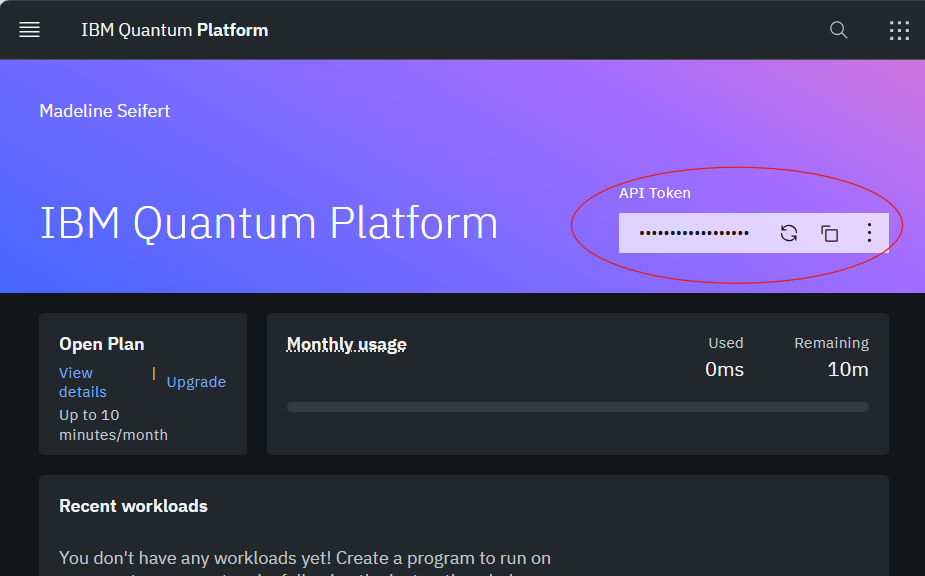

### Setting up a Quantum Channel

To run our code on IBM's quantum computers, we have to set up a channel to connect us to their computers. 

Paste the API token from your account into the text below that says `YOUR_TOKEN_HERE`. Then, run the code cell to set up the quantum channel.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='YOUR_TOKEN_HERE'
)

# You can also save your API credentials on disk for future use
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='YOUR_TOKEN_HERE')

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

# If you saved your credentials, you can now run this line to
# quickly set up a channel without your API token
service = QiskitRuntimeService()

## Qiskit Circuits and Operators

As mentioned previously, quantum computers use quantum circuits, which are made up of quantum logic gates. Since quantum computing is a new field, we will almost always be thinking at the circuit level. With the Qiskit Circuit library, we can create these quantum circuits as well as draw diagrams of them.


In [2]:
# Import the Qiskit Circuit library
from qiskit import QuantumCircuit 

The following code snippets all use the Qiskit Circuit library. Note how similar each code block is! 

### Hadamard Gate 

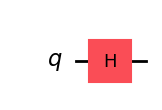

In [3]:
# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1) 

# Add a Hadamard gate to the 0th qubit
qc.h(0)

# Draw a diagram of the circuit with matplotlib
qc.draw("mpl")

### X (NOT) Gate  


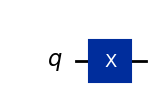

In [4]:
qc = QuantumCircuit(1) 
qc.x(0)  # Add an X gate to the 0th qubit
qc.draw(output='mpl') 

### Z Gate

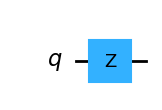

In [5]:
qc = QuantumCircuit(1)
qc.z(0)  # Add a Z gate to the 0th qubit
qc.draw(output='mpl')

### CNOT Gate 

Recall that a CNOT Gate is applied to two qubits, unlike the previous gates.

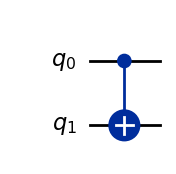

In [6]:
# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Add a CNOT gate with the 0th qubit as the control qubit
# and the 1st qubit as the target qubit
qc.cx(0,1)  

qc.draw(output='mpl')

Next, we will move on to the role of operators in quantum computing. 

Operators are essential to measuring, analyzing, and transforming quantum states. Operators allows us to transform a qubit within a circuit. They are also used to represent measurable physical properties like spin. In this way, they can provide information about the state of the qubits. The Pauli Operators are the most important and common operators used in quantum computing. These operators are the X, Y, and Z gates:

$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
\:
Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}
\:
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$



We can take this up a notch by using different Qiskit classes to work with operators. One commonly used class is SparsePauliOp. This class allows for user to create more complex Pauli Operators, such as $ZZ$, $XX$, etc., which are operators that act on joint quantum states of two qubits (like how the CNOT gate works on two qubits). Such operators can be used to provide inishgt on these states as well as the correlation between the qubits in these states.

Below is a run down on creating a two-qubit Bell state and measuring it with the $ZZ$ and $XX$ operators. A Bell state is a two-qubit state that is *maximally entangled* and is represented as 

$$ \ket{\Phi^+} = \dfrac{1}{\sqrt{2}}(\ket{00} + \ket{11}) $$

Note that in this state, if you measure one of the qubits as $\ket{0}$, it means that the other qubit also collapses to $\ket{0}$. If you measure one of the qubits as $\ket{1}$, the other qubits also becomes $\ket{1}$. This is what it means to be maximally entangled (the states of the two qubits are so intertwined with each other that doing something to one of the two directly affects the properties of the other).

For now, it is important to note that SparsePauliOp is used to create observables on the two qubits created in this circuit. 

Use of Pauli Operators:

In [7]:
from qiskit.quantum_info import Pauli

# Make a one qubit quantum circuit with a Hadamard gate
qc = QuantumCircuit(1)
qc.h(0)

# Define an observable (e.g., Pauli-Z operator)
observable = Pauli('Z')

observable

Pauli('Z')

Use of Sparse Pauli Operators:

In [9]:
from qiskit.quantum_info import SparsePauliOp

# Define a quantum circuit with 2 qubits
qc = QuantumCircuit(2)
qc.h(0) # Apply Hadamard gate - create superposition
qc.cx(0, 1) # Apply CNot Gate - entangle qubits

# Define ZZ and XX observables for measuring properties of the two qubits above.
observables_labels = ["ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

observables

[SparsePauliOp(['ZZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['XX'],
               coeffs=[1.+0.j])]

Later in this tutorial, we will show how you can use these observables to extract meaningful information from the quantum circuit.

## Qiskit Primitives

As you may already know, in computer science a *primitive* is the simplest building block of a programming language (e.g. ints, floats, bools, chars, etc.). Note that programming languages are used to abstract away all of the electrical signals that happen in the hardware which allow your program to run. 

The same is true for quantum computers. Currently, the quantum computing field mostly thinks with circuits. To get meaningful information from these circuits, quantum computers can either calculate expectation values or sample quantum states. These are the two most common tasks that quantum computers do, and are what Qiskit's primitives are based on.

Qiskit has two primitives: ***Sampler*** and ***Estimator***

1. Estimator is used to compute the expectation values of observables in a circuit
2. Sampler is used to compute quasi-probabilities of outcomes in a circuit.

Note that here, quasi-probabilities refer to the theoretical probabilities of a qubit's value after they have been transformed and measured in a circuit.

In [11]:
##### Estimator Example #####

# Import Estimator library
from qiskit.primitives import Estimator

# The example circuit is from our example of Pauli Operators above
qc = QuantumCircuit(1)
qc.h(0)

# Define observables
observable = Pauli('Z')

# Choose a backend (more on in the following section)
backend = AerSimulator

# Create the estimator primitive  and calculate the expectation value of our observable
estimator = Estimator(backend = backend) 
job = estimator.run(circuits=[qc], observables=[observable])
result = job.result()

# Output expectation value
print(f"Expectation value: {result.values[0]}")

NameError: name 'AerSimulator' is not defined

In [1]:
##### Sampler Example #####

# Import Sampler Library
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Create a Bell state
qc = QuantumCircuit(2)
qc.h(0)  # Create superposition
qc.cx(0, 1)  # Entangle qubits

# Instantiate and run sampler
sampler = Sampler(backend=backend) 

# Note that unlike the estimator primitive, you do not need observables
job = sampler.run(circuits=[qc])
result = job.result()

# Extract Quasi-Probabilities For Qubit
print(result.quasi_dists[0])

NameError: name 'QuantumCircuit' is not defined

## Transpilation

In classical computing, to run a program we write it first has to be compiled. In this compilation stage, our code gets translated from human-readable to machine-readable code. Furthermore, since every computer has different architectures and instruction sets, a compiler has make sure that the machine-readable code that it outputs can be read by the computer the program is being run on.

Similarly, quantum computers have *transpilation*, which can be thought of as compilation for quantum computers. Under the hood, quantum computers use topology to create circuits in different ways (this is used to take advantage of problem symmetries and help with things like error correction). So, transpilation is when a quantum circuit is translated to match a quantum computer's topology. In this stage, circuit instructions are also transformed to match the quantum computer's instruction set and are optimized (just like with a compiler). 

It turns out that this stage is what separates beginners from experts. So, transpilation gets very complicated very quickly. In this section we will give a high-level overview of this stage and highlight the most important components.

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

## Running Jobs

The first step in running a quantum job is choosing where it will be executed, which is called a backend. A backend in Qiskit is either a simulator or a real quantum device. In this section, we will explore what both of these options look like.



Choosing a Simulator

Simulators emulate quantum computations on classical hardware. They are fast, noise-free (unless specified), and ideal for testing and debugging circuits. Qiskit has the following simulators:  
- AerSimulator   
- Aer Provider
- QasamSimulator
- Statevector Simulator
- Unitary Simulator  
- AerError

These are local sumulators that run on your local machine and are provided by the qiskit-aer module.

In addition, Qiskit has simulators that run in the cloud and that are provided by the qiskit-ibm-runtime module.  

For now, we will focus on local sumulators, specifically on AerSumulator. AerSimulator provides versatile options for simulating quantum circults by emulating different types of simulations, which include QASM simulator, Statevector Simulation, and Unitary Simulator.  

- QASM Simulator: Is useful to analyze probabilistic measurement because they mimic quantum measurements and provide a histogram of outcomes. 
- Statevector Simulator: Is useful to study the exact quantum state for debudding or theoretical analysis because it provides the exact quantum state of a circuit as an amplitude vector 

- Unitary Simulator: Is useful to understand the mathemtical transofrmation of a quantum circuit because it computes the unitary matrix representing the quanatum circuit. 

Below, we will be accesing AerSimulator's Unitary Simulator. 

In [7]:
# To start, import the neccesary libraries, which are the following: 
from qiskit_aer import Aer 
from qiskit import QuantumCircuit
# We will create a CNOT gate like we did in the example above 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)  

# We wil call meausre_all to ensure that every qubit in the circuit 
# is measured. Without this, no classical results would be returned and 
# the quantum state would remain in superposition or entanglement. 
qc.measure_all() #add measurements

#simulator backend
simulator = Aer.get_backend('aer_simulator')

"""Notice that within the execulte parameter we set shots to equal 1024. 
Shots referes to the number of times of quantum circuit is executed 
to gaher measurement outcomes. This is neccesary since quantum measurements
are probabilistic so running multiple times allows us to estimate the 
probability distribution of the results. """
# Run the circuit
job = simulator.run(qc, shots=1024)
result = job.result() 
print(result.get_counts(qc))


{'00': 483, '11': 541}


Choosing a Real Device

After setting up an account through IBM, you can set up a backend using QiskkitRuntimeService to get access to a real quantum computing device.  



In [ ]:
"""
RECALL the set up that occured above
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService

# Setup the quantum channel
service = QiskitRuntimeService(channel="ibm_quantum",
                              token = "YOUR_TOKEN_HERE")
"""

If you do not want to select a specific device, you can run the following command to set your default device as the device that is currently facing the least traffic. The least_busy function's parameters allow us to specificy that the backend we are looking for does not include simulators (only realy devices) and are in operation. 

In [3]:
backend = service.least_busy(simulator=False, operational=True)

In order to view what devices are available to use on IBM's service, you can use the following command:

In [ ]:
print(service.backends())

Once we have chosen a device from this list, we can set it as our backend. (For this example, we will be selecting imbq quito.)

In [ ]:
backend = service.backend("Insert Device Name Here")

We can now successfully create the circuit, choose a device, execute the circuite, and extract the measurements of the qubits. 

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService 
#from qiskit_ibm_runtime import job_monitor

# Define a quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)


# Load IBM Quantum service and choose a real device
service = QiskitRuntimeService()
backend = service.backend('Insert Device Name Here') 
qc.measure_all()

# Transpile the circuit for the device
qc = transpile(qc, backend)

# Execute the circuit on the real devic and specific the number of shots
job = backend.run(qc, shots=1024)   

#monitor job status
#job_monitor(job) 

#retrieve results 
result = job.result()
counts = result.get_counts()
print(counts)

Pubs 

Another sphere of running jobs is the concept of PUBS. A PUB is essentially a tuple that carrie sthe circuit, parameters, and other input needed for quantum computations. The Estimator and Sampler privitives accept PUBS as inputs in their run() method , execute the workloads, and return results with structure.

 Our earlier example (from our Qiskit Primitives section) of running an circuit using the Estimator primitive was a basic example of calculating the expectation value of a single circuit with one observable. However, we can extend of the Estimator primitive to handle parameterized circuits and vectorized workloads. This allows us to calculate expectations for multiple observables and over multiple parameter values. Adding parameters is useful because it allows us to compute a large number of expectation values in a single job.  

 The same goes for the Sampler primitive. Our earlier example (from our Qiskit Primitives section) focused on demostrating the basic functinoality of the Sampler primitive, which is calculating quasi-probabilities. The functionality of the Sampler primitive can be extended to combine the circuit with a parameter sweep to compute results for multiple configurations in one job by enabling vectorized execution.

We will explore what PUBS look like applied below in our workflow example. 

## Post-processing and Plotting

For plotting and post-processing the data after running the quantum program, we will use matplotlib and qiskit.visualization for visualizing the results.

We will also handle the following: 
- data analysis 
- normalization
- error analysis 
- more visialization enhancements

Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator
from scipy.stats import norm
import seaborn as sns

Initialize Quiskit service and Select Backend

In [ ]:
# Initialize Qiskit service and select backend
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)

# Create Sampler object to run the job
sampler = Sampler(backend=backend)

Define Quantum Circuit

In [ ]:
# Define a quantum circuit (replace this with your actual quantum circuit)
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

Run the Sampler Job and Retrieve Results 

In [ ]:
# Run the job using Sampler
job = sampler.run([qc])
result = job.result()

# 1. Handle and Normalize Quasi-Distribution Results
counts = result.quasi_dists[0]
print("Quasi-Distribution Results:", counts)

# Normalize the quasi-distribution (if necessary)
total_count = sum(counts.values())
normalized_counts = {key: val / total_count for key, val in counts.items()}

# Statistical analysis of the quasi-distribution
avg = np.mean(list(normalized_counts.values()))
std_dev = np.std(list(normalized_counts.values()))
print(f"Average Quasi-Distribution Value: {avg}, Standard Deviation: {std_dev}")

Plot Quasi-Distribution

In [ ]:
# Plot the Quasi-Distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_histogram(normalized_counts, color='blue')
plt.title("Normalized Quasi-Distribution")

Handle Expectation values with error analysis 

In [ ]:
# 2. Handle Expectation Values with Error Analysis
# Define observables (ZZ and XX)
observables = [SparsePauliOp("ZZ"), SparsePauliOp("XX")]
estimator = Estimator(backend=backend)

# Run the Estimator job
job = estimator.run([(qc, observables)])
result = job.result()

# Get the expectation values
expectation_values = result[0]
print("Expectation Values:", expectation_values)

# Assuming the results are in the form of a dictionary, extract them
observables = list(expectation_values.keys())
values = list(expectation_values.values())

# Error values (example, replace with actual errors if available)
errors = [0.1, 0.05]  # Example for error values for each observable, we can play around with the numbers

# Plot Expectation Values with error bars
plt.subplot(1, 2, 2)
plt.bar(observables, values, yerr=errors, capsize=5, color='green')
plt.xlabel("Observables")
plt.ylabel("Expectation Value")
plt.title("Expectation Values with Error Bars")

Combine and Show Plots

In [ ]:
# 3. Combine the Plots into a Single Figure
plt.tight_layout()
plt.show()

Advanced analysis - Fitting a Normal distribution 

In [ ]:
# 4. Advanced Data Analysis (Optional):
# Fit the normalized quasi-distribution to a normal distribution and plot
sns.histplot(list(normalized_counts.values()), kde=True, stat="density", bins=30, color='purple')

# Fit a normal distribution to the data
mu, std = norm.fit(list(normalized_counts.values()))
print(f"Fitted Normal Distribution Parameters: Mean = {mu}, Std = {std}")

# Plot the fitted Gaussian distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fitted Normal Distribution to Quasi-Distribution")
plt.show()

# Part III. The Qiskit Workflow

In this section, we will be exploring the typical workflow when programming with Qiskit. In general, we follow the following steps:

1. Map the Problem to Circuits and Operators
2. Optimize for Quantum Hardware
3. Execute on the Backend
4. Post-process and Plot

To illustrate these steps, we will investigate two problems regarding the 4-qubit GHZ state, one which uses a Sampler and one that uses an Estimator. In general, the GHZ state is a maximally entangled quantum state that involves $n$ qubits. For this example, we will be using for qubits. In Dirac Notation, this four-qubit state is written as:

$$
\ket{GHZ} = \dfrac{1}{\sqrt{2}}(\ket{0000} + \ket{1111})
$$

Note that this is very similar to the Bell State, and that the Bell State is like a 2-qubit GHZ state.

## Finding Entanglement

The first problem we'd like to investigate is the entanglement found between the qubits in the GHZ state. To do so, we will need to find the expectation values of $ZZ$ gates. These operators measure the correlation between qubits, which is dependent on quantum entanglement. Due to quantum mechanics, this measurement isn't always the same. So, the expectation value of the $ZZ$ gates give us the expected correlation between two qubits.

### Step 1: Map the Problem to Circuits and Operators

In [ ]:
# Circuit with 4 qubits
ghz_e = QuantumCircuit(4)

# Add the gates for the GHZ state
ghz_e.h(0)
for i in range(3):
    ghz_e.cx(i, i+1)

ghz_e.draw(output="mpl")

In [ ]:
# Set up the observables

# NOTE: NEED EXPLANATION FOR WHY THESE ARE THE OBSERVABLES
observables_labels = ["ZZII", "ZIZI", "ZIIZ"]
observables = [SparsePauliOp(label) for label in observables_labels]

### Step 2: Optimize for Quantum Hardware

In [ ]:
backend = service.least_busy(simulator=False, operational=True)
 
# Transpile the quantum circuit
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=1)
ghz_e_transpiled = pass_manager.run(ghz_e)

ghz_e_transpiled.draw('mpl', idle_wires=False)

### Step 3: Execute on the Backend

In [ ]:
# Construct the Estimator instance
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(ghz_e_transpiled.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(ghz_e_transpiled, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f"Job ID: {job.job_id()}")

In [ ]:
# TODO: this is from ibm, add explanation and maybe edit

# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

### Step 4: Post-Process and Plot

In [ ]:
# Plot the result
# TODO: add explanation and figure out this code
 
values = pub_result.data.evs
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

*TODO: Include an explanation why this is the graph we expect*

## Getting Measurements

The second problem we'd like to investigate is what values do we get when we measure the GHZ state. Since the GHZ state is maximally entangled, we expect to see a range of different values upon measurement. We can visualize this range by creating a probability distribution of the resulting values after measurement. To do so, we would need to use a Sampler.

### Step 1: Map the Problem to a Circuit

In [ ]:
# Quantum circuit with 4 quantum channels (classical channels to be added later)
ghz_s = QuantumCircuit(4)

# Create the circuit for a 4-qubit GHZ state
ghz_s.h(0)
for i in range(3):
    ghz_s.cx(i, i+1)


# We need to measure the state and store it 
ghz_s.measure_all() # measure_all adds the classical channels by default

ghz_s.draw('mpl')

In [ ]:
# We do not need any observables since we are sampling measurements taken from the circuit

### Step 2: Optimize for Quantum Hardware

In [ ]:
backend = service.least_busy(simulator=False, operational=True)
# backend = service.backend("ibm_brisbane")
# backend = FakeAlmadenV2()

# Transpile the quantum circuit
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=1)
ghz_s_transpiled = pass_manager.run(ghz_s)

ghz_s_transpiled.draw('mpl', idle_wires=False)

### Step 3: Execute on the Backend

In [ ]:
# Construct the Estimator instance
sampler = Sampler(mode=backend)
sampler.options.default_shots = 5000 # TODO: learn what this stuff does
 

# One pub, with one circuit to run against no parameters
job = sampler.run([(ghz_s_transpiled)])
 
# Use the job ID to retrieve your job data later
print(f"Job ID: {job.job_id()}")

In [ ]:
# TODO: get job results once its done running from ibm

# Get results

# job = service.job("cwvfpwvtdtng00879rrg")
job_result = job.result()
 
# This is the result from our single pub, which had no parameters
pub_result = job.result()[0]

### Step 4: Post-Process and Plot

In [ ]:
quasi_dists = job_result.quasi_dists[0]
 
# plotting graph
plot_histogram(quasi_dists)

*TODO: do some analysis/interpretation of the graph*

# Part IV: Combining Classical and Quantum Computing

Building upon the Qiskit workflow, we will create a truly random password generator that makes use of both quantum and classical computation.

First, let's generate some random numbers with our newly gained quantum computing skills. We create a quantum circuit with 8 qubits, put them in superposition, and then measure them. We then convert the results of our job into an integer. The function `generate_random_number()` below implements this behavior. Read through this function and try to identify the different parts of the Qiskit workflow that you learned earlier.

*NOTE:* Instead of running this on IBM's server, we will use the AerSimulator instead for efficiency purposes. For an extra challenge, you can apply what you learned in the last section to change the code to run the job on IBM's service.

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

def generate_random_number():
    while True: 

        # Circuit w/ 4 qubits and 4 classical bits
        qc = QuantumCircuit(8, 8)
        
        # Put each qubit in superposition
        for i in range(8):
            qc.h(i)
        
        # Measure all qubits
        qc.measure(range(8), range(8))
        
        # AerSimulator backend
        simulator = AerSimulator()
        job = simulator.run(qc, shots=1)
        result = job.result()
        counts = result.get_counts()
        
        # Binary result converted into an integer
        random_binary = list(counts.keys())[0]
        random_number = int(random_binary, 2)
        
        return random_number

Now, let's use this function to create a whole list of random numbers. We'll use the function below to generate a list of random numbers.

In [ ]:
def generate_random_numbers(n):
    random_numbers = [generate_random_number() for _ in range(n)]
    return random_numbers

Now, run the code cell below to generate a list of 10 random numbers. Try adjusting the value to generate larger or smaller lists. 

In [ ]:
random_numbers = generate_random_numbers(10)
print(random_numbers)

Now that we made some truly random numbers, let's create a function that turns our numbers into characters. To do that, we'll map each number to a character that can be used in a password. The function `num_to_char()` is defined below and will convert a given integer to a password character.

In [ ]:
# Map a given number to a valid password character
def num_to_pchar(num):
    # Map to one of the 93 possible ASCII characters in the range 33-126
    num = ((num % 93) + 33)
    return chr(num)

Use the `num_to_char()` function to complete the `generate_password()` function below, which will take in a list of integers and return a password as a string.

In [ ]:
# Create a string from a given list of numbers
def generate_password(nums):
    password = ""

    # TODO: Implement this function!
    # Hint: Call `num_to_pchar()` on each number

    # SOLUTION:
    for num in nums:
        pword += num_to_pchar(num)
    
    
    return password

Now we can combine this with our random number generator we made before to generate a random password! If you implemented the `generate_password()` function correctly, running the code below will print a randomly generated password. 

Try editing the amount of random numbers you generate, as this will correlate to how many characters are in the password.

In [ ]:
rand_nums = generate_random_numbers(10)  # Generate a list of random numbers
password = generate_password(rand_nums)  # Turn the numbers into a password

print(password)

# Part V: Conclusion

To conclude this tutorial, we have provided some resources to guide you to further explore more quantum computing concepts and applications. 

[**Grover's Algorithm**](https://github.com/lynkos/grovers-algorithm/blob/main/src/grovers_algorithm.ipynb) - Learn about one of the most popular quantum algorithms and how to use it.  

[**Grover's Algorithm Applications**](https://github.com/qiskit-community/qiskit-algorithms/blob/main/docs/tutorials/07_grover_examples.ipynb) - Apply Grover's Algorithm to different use cases.

[**Advanced Circuit Tutorials**](https://github.com/CQCL/qiskit-tutorial/tree/master/qiskit/terra) - Dive deeper into quantum circuits and how to create them with Qiskit. 

[**Plotting Data**](https://github.com/CQCL/qiskit-tutorial/blob/master/qiskit/basics/plotting_data_in_qiskit.ipynb) - Learn different ways of vizualizing data using the Qiskit library.

[**Algorithms Tutorials**](https://github.com/qiskit-community/qiskit-algorithms/tree/main/docs/tutorials) - Explore more popular quantum algorithms and their applications.

# References

1. https://www.ibm.com/topics/qubit
2. https://github.com/lynkos/grovers-algorithm/blob/main/src/grovers_algorithm.ipynb
3. https://www.youtube.com/playlist?list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi
4. https://docs.quantum.ibm.com/guides
5. https://www.youtube.com/watch?v=8VgBPEcZ_X0 
6. https://dojo.qulacs.org/en/latest/notebooks/1.4_quantum_circuit_diagram.html
7. https://www.techtarget.com/searchdatacenter/tip/Classical-vs-quantum-computing-What-are-the-differences
8. https://python-reference.readthedocs.io/en/latest/docs/str/ASCII.html